In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2026-02-18 15:41:08.829071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771429269.073621      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771429269.142502      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771429269.721026      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771429269.721087      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771429269.721092      55 computation_placer.cc:177] computation placer alr

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

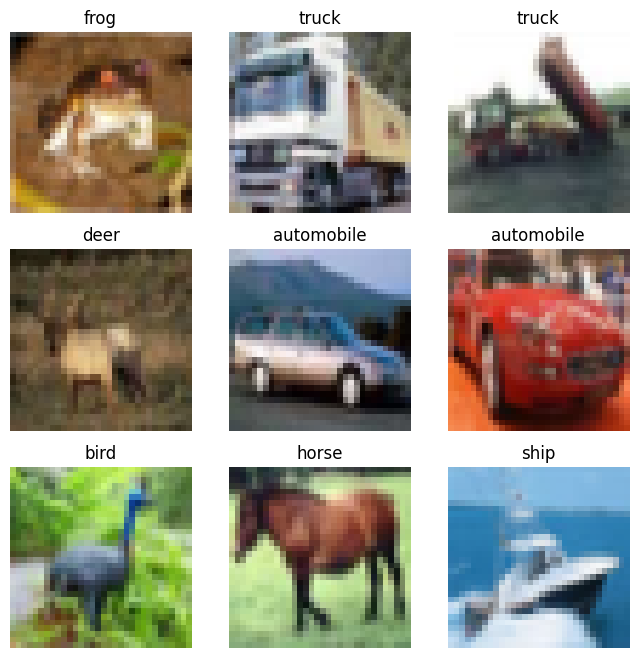

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

In [7]:
data_aug = models.Sequential([
    layers.RandomFlip("horizontal"),         
    layers.RandomRotation(0.1),               
    layers.RandomZoom(0.1)                    
])

In [9]:
model = models.Sequential()

model.add(data_aug)

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train,y_train,epochs=10,
                    validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3357 - loss: 1.7993 - val_accuracy: 0.5061 - val_loss: 1.3647
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5068 - loss: 1.3794 - val_accuracy: 0.5262 - val_loss: 1.3536
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5512 - loss: 1.2561 - val_accuracy: 0.6011 - val_loss: 1.1267
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.5825 - loss: 1.1740 - val_accuracy: 0.5985 - val_loss: 1.1414
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6034 - loss: 1.1256 - val_accuracy: 0.6125 - val_loss: 1.1003
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6154 - loss: 1.0919 - val_accuracy: 0.6426 - val_loss: 1.0247
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6344 - loss: 1.0412 - val_accuracy: 0.6231 - val_loss: 1.0824
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6355 -

In [13]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6587 - loss: 0.9898
Accuracy: 0.6561999917030334


In [14]:
pred = model.predict(x_test)
print(class_names[pred[0].argmax()])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
dog


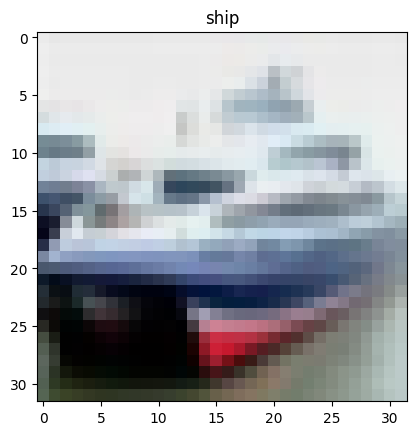

In [22]:
plt.imshow(x_test[1])
plt.title(class_names[pred[1].argmax()])
plt.show()

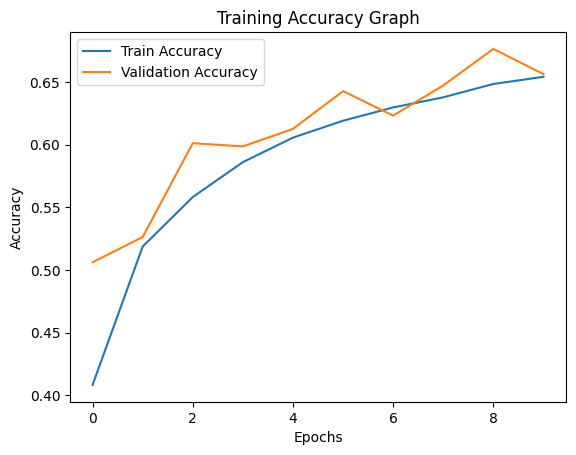

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()